<a href="https://colab.research.google.com/github/Harshx001/Smart-Traffic-Prediction/blob/main/Copy_of_Smarttraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")

In [ ]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


# Extract some valuable information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

,0
traffic_volume,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df.duplicated().sum()

np.int64(17)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(48187, 9)

# Step 1: Preprocessing - Create time-related features and congestion levels


In [ ]:

# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Extract useful time features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek # Monday=0, Sunday=6
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['day_of_year'] = df['date_time'].dt.dayofyear
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # 1 for weekend, 0 for weekday

def traffic(volume):
  if volume <= 3000:
    return 'Low'
  elif volume <= 6000:
    return 'Medium'
  else:
    return 'High'

df['congestion_level'] = df['traffic_volume'].apply(traffic)


df['congestion_level'].value_counts()


,count
congestion_level,
Medium,23164
Low,21521
High,3502


In [ ]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month,year,day_of_year,is_weekend,congestion_level
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9,1,10,2012,276,0,Medium
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10,1,10,2012,276,0,Medium
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11,1,10,2012,276,0,Medium
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12,1,10,2012,276,0,Medium
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13,1,10,2012,276,0,Medium


In [ ]:
# Convert temperature from Kelvin to Celsius
df['temp_celsius'] = df['temp'] - 273.15

# Create a binary 'IsHoliday' feature
df['is_holiday'] = df['holiday'].apply(lambda x: 1 if x != 'None' else 0)

In [ ]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month,year,day_of_year,is_weekend,congestion_level,temp_celsius,is_holiday
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9,1,10,2012,276,0,Medium,15.13,1
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10,1,10,2012,276,0,Medium,16.21,1
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11,1,10,2012,276,0,Medium,16.43,1
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12,1,10,2012,276,0,Medium,16.98,1
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13,1,10,2012,276,0,Medium,17.99,1


# Drop some original data like temp, date_time

In [ ]:
df.drop(['temp', 'date_time', 'holiday'], axis=1, inplace=True)

In [ ]:
df.head(50)

,traffic_volume,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,month,year,day_of_year,is_weekend,congestion_level,temp_celsius,is_holiday
0,5545,0.0,0.0,40,Clouds,scattered clouds,9,1,10,2012,276,0,Medium,15.13,1
1,4516,0.0,0.0,75,Clouds,broken clouds,10,1,10,2012,276,0,Medium,16.21,1
2,4767,0.0,0.0,90,Clouds,overcast clouds,11,1,10,2012,276,0,Medium,16.43,1
3,5026,0.0,0.0,90,Clouds,overcast clouds,12,1,10,2012,276,0,Medium,16.98,1
4,4918,0.0,0.0,75,Clouds,broken clouds,13,1,10,2012,276,0,Medium,17.99,1
5,5181,0.0,0.0,1,Clear,sky is clear,14,1,10,2012,276,0,Medium,18.57,1
6,5584,0.0,0.0,1,Clear,sky is clear,15,1,10,2012,276,0,Medium,20.02,1
7,6015,0.0,0.0,1,Clear,sky is clear,16,1,10,2012,276,0,High,20.71,1
8,5791,0.0,0.0,20,Clouds,few clouds,17,1,10,2012,276,0,Medium,20.99,1
9,4770,0.0,0.0,20,Clouds,few clouds,18,1,10,2012,276,0,Medium,19.95,1


# converting the categorical data into numeric value

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['weather_main_encoded'] = le.fit_transform(df['weather_main'])

In [ ]:
df['weather_description_encoded'] = le.fit_transform(df['weather_description'])

In [ ]:
df.drop(['weather_main', 'weather_description'], axis=1, inplace=True)

In [ ]:
df.head(50)

,traffic_volume,rain_1h,snow_1h,clouds_all,hour,day_of_week,month,year,day_of_year,is_weekend,congestion_level,temp_celsius,is_holiday,weather_main_encoded,weather_description_encoded
0,5545,0.0,0.0,40,9,1,10,2012,276,0,Medium,15.13,1,1,24
1,4516,0.0,0.0,75,10,1,10,2012,276,0,Medium,16.21,1,1,2
2,4767,0.0,0.0,90,11,1,10,2012,276,0,Medium,16.43,1,1,19
3,5026,0.0,0.0,90,12,1,10,2012,276,0,Medium,16.98,1,1,19
4,4918,0.0,0.0,75,13,1,10,2012,276,0,Medium,17.99,1,1,2
5,5181,0.0,0.0,1,14,1,10,2012,276,0,Medium,18.57,1,0,27
6,5584,0.0,0.0,1,15,1,10,2012,276,0,Medium,20.02,1,0,27
7,6015,0.0,0.0,1,16,1,10,2012,276,0,High,20.71,1,0,27
8,5791,0.0,0.0,20,17,1,10,2012,276,0,Medium,20.99,1,1,4
9,4770,0.0,0.0,20,18,1,10,2012,276,0,Medium,19.95,1,1,4


# Exploratory Data Analysis (EDA) and Visualization ---

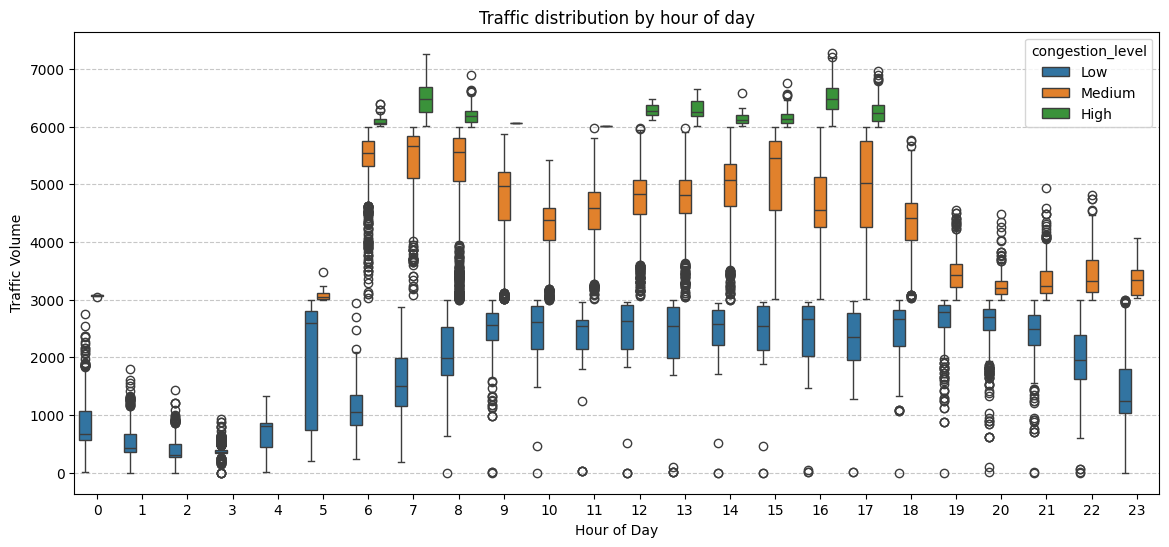

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("Traffic distribution by hour of day")
sns.boxplot(x="hour", y="traffic_volume", hue="congestion_level", data=df)
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**boxplot for day of week**

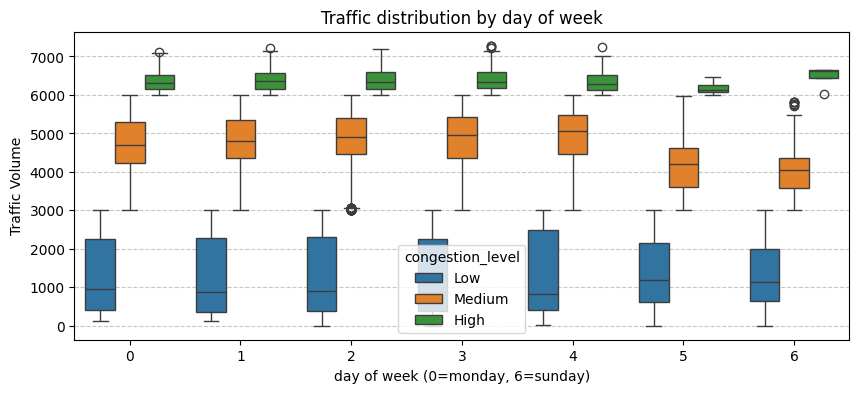

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Traffic distribution by day of week")
sns.boxplot(x="day_of_week", y="traffic_volume", hue="congestion_level", data=df)
plt.xlabel('day of week (0=monday, 6=sunday)')
plt.ylabel('Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

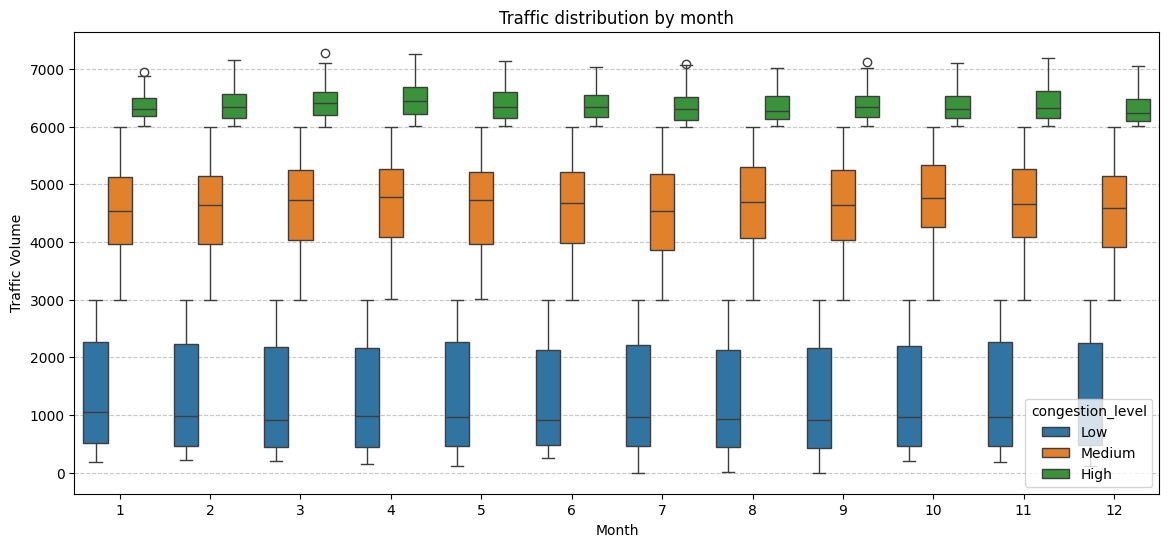

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("Traffic distribution by month")
sns.boxplot(x="month", y="traffic_volume", hue="congestion_level", data=df)
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

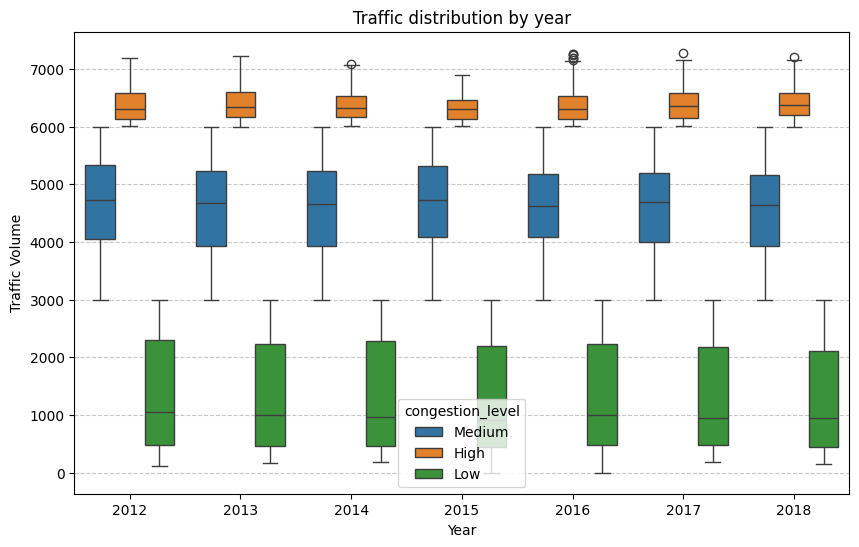

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Traffic distribution by year")
sns.boxplot(x="year", y="traffic_volume", hue="congestion_level", data=df)
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Now we will find the correalation of data with the help of data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


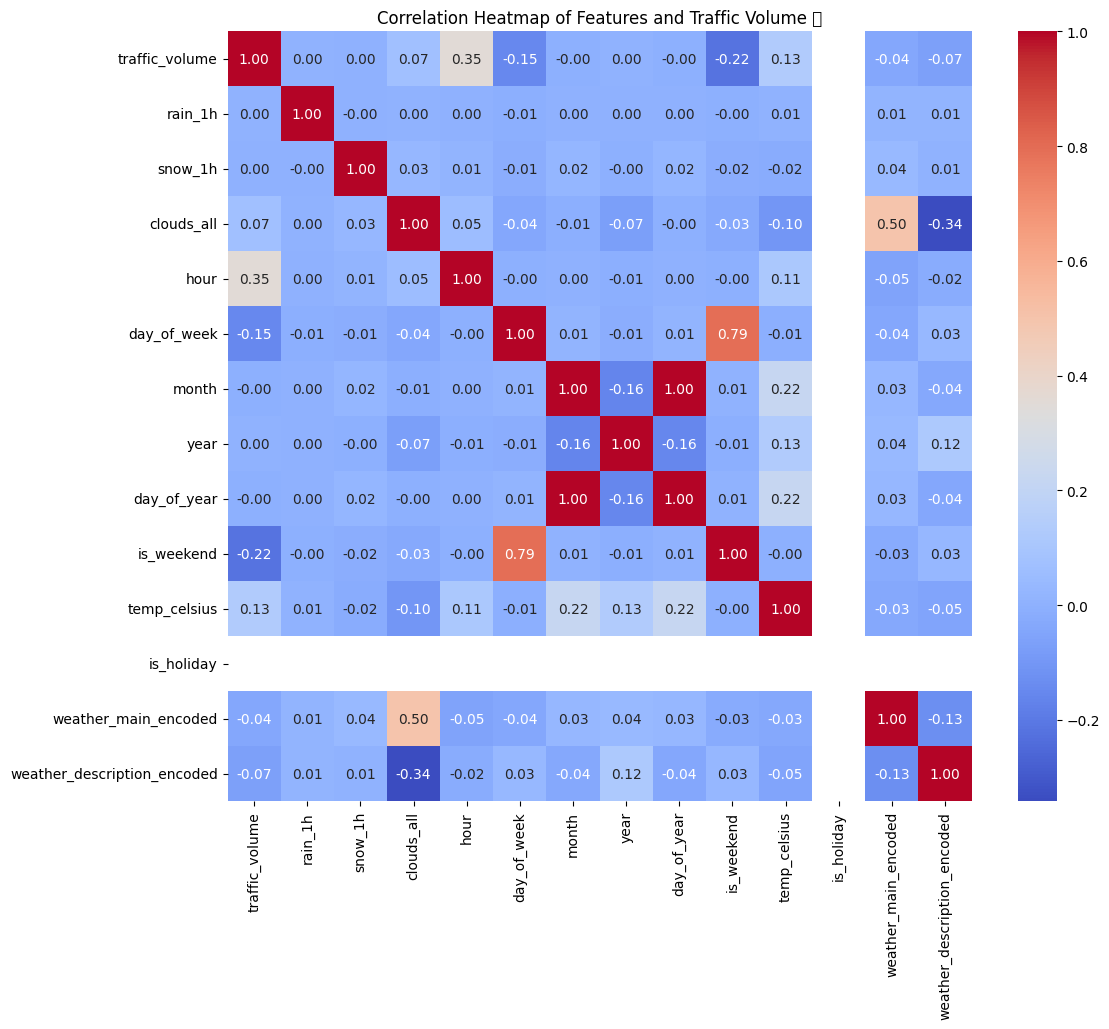

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Traffic Volume 🌡️')
plt.show()

We'll first separate the input variables from the target variable (traffic_volume) and then split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['traffic_volume', 'congestion_level'], axis=1)
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (38549, 13)
Testing data shape: (9638, 13)


# Features scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [ ]:

numerical_cols = [
    'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week',
    'month', 'year', 'day_of_year', 'temp_celsius'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features in both training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.head())
print(X_test.head())

        rain_1h   snow_1h  clouds_all      hour  day_of_week     month  \
44765 -0.130916 -0.027602    1.042795  1.380266     0.007288 -0.152502   
8090  -0.130916 -0.027602    0.376389  1.668149    -0.490845  0.141762   
33257 -0.130916 -0.027602    1.042795  0.084791    -1.487112 -0.446766   
33820 -0.130916 -0.027602    0.658330 -1.066742     1.003555 -0.446766   
18152 -0.130916 -0.027602   -1.238363  0.228733     0.007288  0.730289   

           year  day_of_year  is_weekend  temp_celsius  is_holiday  \
44765  1.316364    -0.240068           0      1.065080           1   
8090  -1.326002     0.279253           0      0.749521           1   
33257  0.787891    -0.595898           0     -0.329078           1   
33820  0.787891    -0.413175           1      0.070431           1   
18152 -0.269055     0.673552           0      0.912173           1   

       weather_main_encoded  weather_description_encoded  
44765                     1                           19  
8090            

#Random Forest Regressor ---


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("\n--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)



--- Training Random Forest Regressor ---


In [ ]:
X_test.head()

,rain_1h,snow_1h,clouds_all,hour,day_of_week,month,year,day_of_year,is_weekend,temp_celsius,is_holiday,weather_main_encoded,weather_description_encoded
1162,-0.130916,-0.027602,1.042795,0.228733,-0.988979,1.318816,-1.854475,1.298660,0,-0.912226,1,1,19
27027,-0.130916,-0.027602,-1.263994,0.948441,1.003555,1.024553,0.259418,0.885127,1,0.884439,1,0,1
21596,-0.130916,-0.027602,1.042795,0.228733,0.007288,-1.035293,0.259418,-1.153687,0,-0.604162,1,1,19
25842,-0.130916,-0.027602,0.683961,-0.490975,0.505421,0.436025,0.259418,0.471594,0,0.808735,1,6,13
17240,7.920547,-0.027602,1.042795,0.228733,1.501688,0.436025,-0.269055,0.365806,1,1.188006,1,10,33


In [ ]:
X_test.shape

(9638, 13)

#Linear Regression ---


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
print("\n--- Training Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


--- Training Linear Regression ---


In [ ]:
X_test.shape

(9638, 13)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\n--- Model Evaluation ---")

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f"\nRandom Forest Regressor:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  R2 Score: {rf_r2:.4f}")

# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)
print(f"\nLinear Regression:")
print(f"  MAE: {lr_mae:.2f}")
print(f"  RMSE: {lr_rmse:.2f}")
print(f"  R2 Score: {lr_r2:.4f}")


--- Model Evaluation ---

Random Forest Regressor:
  MAE: 190.53
  RMSE: 335.72
  R2 Score: 0.9718

Linear Regression:
  MAE: 1630.05
  RMSE: 4519.31
  R2 Score: -4.1087


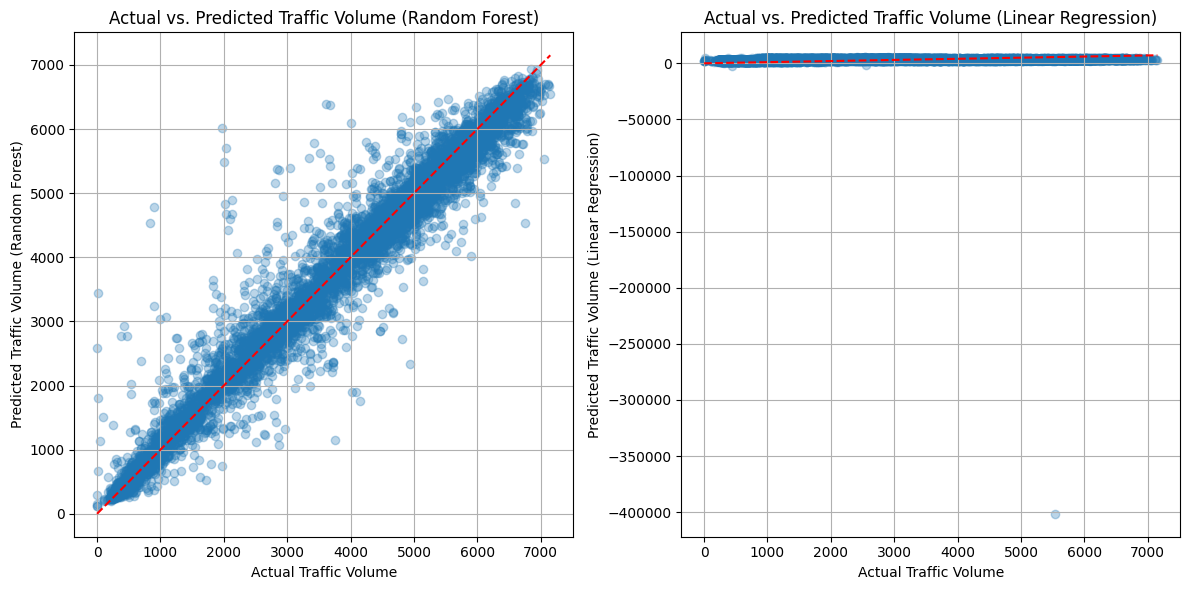

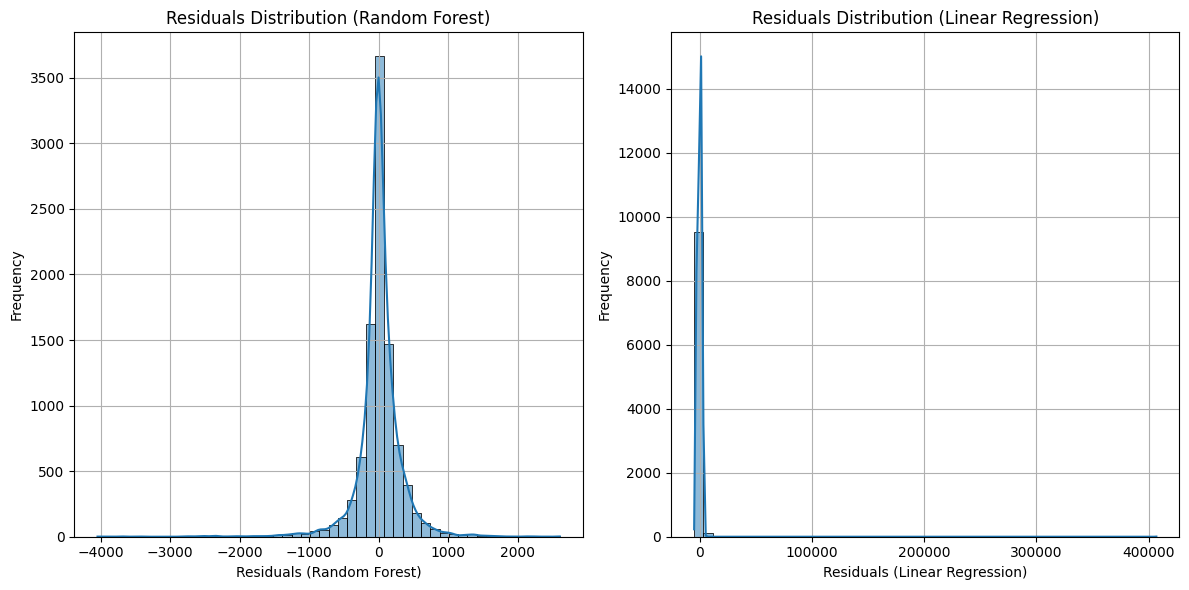

In [ ]:


# --- Compare Plots ---
plt.figure(figsize=(12, 6))

# Plotting predictions vs actual for Random Forest
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume (Random Forest)")
plt.title("Actual vs. Predicted Traffic Volume (Random Forest)")
plt.grid(True)

# Plotting predictions vs actual for Linear Regression
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(y_test, lr_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume (Linear Regression)")
plt.title("Actual vs. Predicted Traffic Volume (Linear Regression)")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# Plotting residuals for both models
rf_residuals = y_test - rf_predictions
lr_residuals = y_test - lr_predictions

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(rf_residuals, kde=True, bins=50)
plt.xlabel("Residuals (Random Forest)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Random Forest)")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(lr_residuals, kde=True, bins=50)
plt.xlabel("Residuals (Linear Regression)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Linear Regression)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,traffic_volume,rain_1h,snow_1h,clouds_all,hour,day_of_week,month,year,day_of_year,is_weekend,congestion_level,temp_celsius,is_holiday,weather_main_encoded,weather_description_encoded
0,5545,0.0,0.0,40,9,1,10,2012,276,0,Medium,15.13,1,1,24
1,4516,0.0,0.0,75,10,1,10,2012,276,0,Medium,16.21,1,1,2
2,4767,0.0,0.0,90,11,1,10,2012,276,0,Medium,16.43,1,1,19
3,5026,0.0,0.0,90,12,1,10,2012,276,0,Medium,16.98,1,1,19
4,4918,0.0,0.0,75,13,1,10,2012,276,0,Medium,17.99,1,1,2


In [ ]:
df.to_csv('wellprocessed_traffic_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
!pip freeze > requirements.txt
